# Grupo Bimbo Inventory Demand

Notebook con la implementación del modelo para [esta](https://www.kaggle.com/c/grupo-bimbo-inventory-demand) competencia en kaggle.


### Ideas principales

* Ocupar redes neuronales con la librería tensorflow.
* Ocupar procesos guassianos con librería por seleccionar.

### Archivos

* train.csv — the training set
* test.csv — the test set
* sample_submission.csv — a sample submission file in the correct format
* cliente_tabla.csv — client names (can be joined with train/test on Cliente_ID)
* producto_tabla.csv — product names (can be joined with train/test on Producto_ID)
* town_state.csv — town and state (can be joined with train/test on Agencia_ID)


### Features

* Semana — Week number (From Thursday to Wednesday)
* Agencia_ID — Sales Depot ID
* Canal_ID — Sales Channel ID
* Ruta_SAK — Route ID (Several routes = Sales Depot)
* Cliente_ID — Client ID
* NombreCliente — Client name
* Producto_ID — Product ID
* NombreProducto — Product Name
* Venta_uni_hoy — Sales unit this week (integer)
* Venta_hoy — Sales this week (unit: pesos)
* Dev_uni_proxima — Returns unit next week (integer)
* Dev_proxima — Returns next week (unit: pesos)
* Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)

# Análisis de los datos

Primero importamos las librerías necesarias

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
import time
import pandas as pd

Generamos una función para leer los datos. Retorna un dataFrame (pandas) de los datos.

In [11]:
# fileName: Name of the csv file.
# Columns: Array with the strings of each column in order.
# rows: Number of rows to be read.
def readData(fileName, columns, rows=None):
    print('Reading file:', fileName)
    start = time.time()
    ret = pd.read_csv(fileName, usecols=columns, nrows=rows)
    finish = time.time()
    print('Shape:', str(ret.shape))
    print('Execution time (seconds):', str(finish-start))
    return ret

In [12]:
columns = ['Semana', 'Producto_ID', 'Demanda_uni_equil']
train_data = readData('Archivos/train.csv', columns, 1000000)

Reading file: Archivos/train.csv
Shape: (1000000, 3)
Execution time (seconds): 0.4839904308319092


Inspeccionemos los datos primero antes de generar cualquier modelo.  
Nuestro valor objetivo es la última columna de nuestros datos: *Demanda_uni_equil*, veamos como se distribuye sobre los datos que hemos tomado.

In [19]:
# Recieves an array of elements and plot its histogram
# array: Values
# maxValue: Max value to be shown in the histogram
def toHist(array, maxValue, title='', xlabel='', ylabel=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.hist(array[array<maxValue], bins=200, color='blue')
    plt.show()

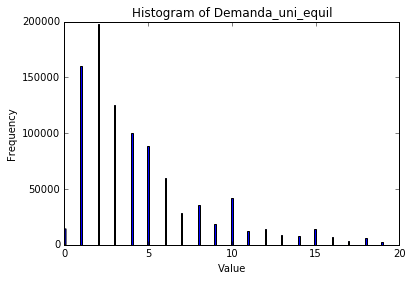

In [21]:
demanda_uni_equil = train_data['Demanda_uni_equil']
toHist(demanda_uni_equil, 20, 'Histogram of Demanda_uni_equil', 'Value', 'Frequency')

Ahora separemos por *Producto_ID* y veamos como se distribuye.

In [32]:
# Check how many different Producto_ID's are.
Producto_ID = train_data['Producto_ID'].drop_duplicates().as_matrix()

In [37]:
# Recieves a dataFrame and a column name (string) and returns a tuple 
# with the keys and a dict
# where the key is de column value and the value is a dataFrame with all
# the rows that have that column value.
def groupBy(dataFrame, columnName):
    different_values = dataFrame[columnName].drop_duplicates()
    dictionary = dict()
    for value in different_values:
        # Select the data that have value in the columnName field.
        data = dataFrame.loc[columnName == value]
        dictionary[value] = data
    return (different_values, dictionary)

In [61]:
different_values = train_data['Producto_ID'].drop_duplicates()
dct = dict()
for value in different_values:
    data = train_data.loc['Producto_ID'==value]
    print(value)
    print(data)
    print('-----')
    dct[value] = data



1212
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
1216
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
1238
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
1240
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
1242
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
1250
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
1309
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
3894
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
4085
Semana                  3
Producto_ID          1212
Demanda_uni_equil       3
Name: 0, dtype: int64
-----
5